# AS.030.421 HW 4
## Sam Dawley
## Due: 9/29/2021

### 1. 
First I copied the `print_rxn(*)` function we made in class to check to make sure I was inputting the stoichiometry correctly. In fact, after I had finished writing all of the code, `kset2` had [NH3] shooting off to infinity and for the life of me I couldn't figure out what had gone wrong. Printing my reaction scheme, however, revealed that I had *placed a -1 in place of a 1 for one of the reactions*... I guess that's just to say this function saved me a lot of time.

In [1]:
def print_rxn(rxn):
    '''
    Parameters
    ----------
    rxn = dictionary w/ 'rate constant':'value', 'stoich':'stoichiometry of rxn as dictionary'
    'rxns' above is an example of what might be passed into this function
    'initial_concentrations.keys()' is an example of what might be passed for species
    
    Returns
    -------
    string delineating the reaction with rate constant appended at the end
    '''
    reactants = ''
    products = ''
    for species in rxn['stoich']:
        # Test if the species is a reactant or product
        # If the coefficient is < 0, reactant!
        # Otherwise, product!
        if rxn['stoich'][species] < 0:
            if reactants != '':
                reactants += ' + '
            reactants += str(-1*rxn['stoich'][species])+str(species)
        else:
            if products != '':
                products += ' + '
            products += str(rxn['stoich'][species])+str(species)
    print(reactants + ' --> ' + products + '   k=' + str(rxn['k']))
    return

Here I establish the dictionaries of rate constants, `kset1` and `kset2`, as well as create dictionaries for each reaction in the process, appending the entire reaction scheme to `rxns1` and `rxns2` for `kset1` and `kset2`, respectively.

In [15]:
import numpy as np

# Set #1 of rate constants for 10 elementary steps in Haber-Bosch process
kset1 = {'k1': 0.8278637422106816, 'k2': 0.39149000993824246, 'k3': 0.8809489691930754, 'k4':
0.8904941743044822, 'k5': 0.49235654862180933, 'k6': 0.3626731669508352, 'k7':
0.8229633538635941, 'k8': 0.6814997598570338, 'k9': 0.28078485107706896, 'k10':
0.4161572873345082}

# Set #2 of rate constants for 10 elementary steps in Haber-Bosch process
kset2 = {'k1': 0.053584533069235385, 'k2': 0.24462483811905555, 'k3': 0.5087814132035998, 'k4':
0.7936118243328263, 'k5': 0.1710041980453506, 'k6': 0.5035332766731492, 'k7':
0.9718026988463234, 'k8': 0.5004715497456229, 'k9': 0.8962148411969465, 'k10':
0.03534836528601604}

# Which set of rate constants to use
kset = kset1

# Dictionaries representing each elementary reaction in the process
rxn1 = {'k': kset['k1'], 'stoich':{'N2': -1, 'N': 2}}
rxn2 = {'k': kset['k2'], 'stoich':{'N': -2, 'N2': 1}}
rxn3 = {'k': kset['k3'], 'stoich':{'H2': -1, 'H': 2}}
rxn4 = {'k': kset['k4'], 'stoich':{'H': -2, 'H2': 1}}
rxn5 = {'k': kset['k5'], 'stoich':{'N': -1, 'H': -1, 'NH': 1}}
rxn6 = {'k': kset['k6'], 'stoich':{'NH': -1, 'N': 1, 'H': 1}}
rxn7 = {'k': kset['k7'], 'stoich':{'NH': -1, 'H': -1, 'NH2': 1}}
rxn8 = {'k': kset['k8'], 'stoich':{'NH2': -1, 'NH': 1, 'H': 1}}
rxn9 = {'k': kset['k9'], 'stoich':{'NH2': -1, 'H': -1, 'NH3': 1}}
rxn10 = {'k': kset['k10'], 'stoich':{'NH3': -1, 'NH2': 1, 'H': 1}}

# List of reactions for kset1
rxns1 = [rxn1, rxn2, rxn3, rxn4, rxn5, rxn6, rxn7, rxn8, rxn9, rxn10]

# Which set of rate constants to use
kset = kset2

# Dictionaries representing each elementary reaction in the process
rxn1b = {'k': kset['k1'], 'stoich':{'N2': -1, 'N': 2}}
rxn2b = {'k': kset['k2'], 'stoich':{'N': -2, 'N2': 1}}
rxn3b = {'k': kset['k3'], 'stoich':{'H2': -1, 'H': 2}}
rxn4b = {'k': kset['k4'], 'stoich':{'H': -2, 'H2': 1}}
rxn5b = {'k': kset['k5'], 'stoich':{'N': -1, 'H': -1, 'NH': 1}}
rxn6b = {'k': kset['k6'], 'stoich':{'NH': -1, 'N': 1, 'H': 1}}
rxn7b = {'k': kset['k7'], 'stoich':{'NH': -1, 'H': -1, 'NH2': 1}}
rxn8b = {'k': kset['k8'], 'stoich':{'NH2': -1, 'NH': 1, 'H': 1}}
rxn9b = {'k': kset['k9'], 'stoich':{'NH2': -1, 'H': -1, 'NH3': 1}}
rxn10b = {'k': kset['k10'], 'stoich':{'NH3': -1, 'NH2': 1, 'H': 1}}

# List of reactions for kset2
rxns2 = [rxn1b, rxn2b, rxn3b, rxn4b, rxn5b, rxn6b, rxn7b, rxn8b, rxn9b, rxn10b]

# Establishing all species and their initial concentrations
baseline_information = {'N2': 1.0, 'H2': 3.0, 'N': 0.0, 'H': 0.0, 'NH': 0.0, 'NH2': 0.0, 'NH3': 0.0}

`kinetic_model_Y` is the function I used to compute the differential changes in concentration for each species. Similar to how we modeled the Iodine clock reaction in class, it utilizes dictionaries as a means of accessing information. Amazingly, it operates pretty quickly, considering there is a `for` loop nested inside of a `for` loop nested inside of a `for` loop.

In [40]:
def kinetic_model_Y(t0, initial_concentrations, species, reactions):
    '''
    Parameters
    ----------
    t0 = float = Time at which to evaluate the system of ODEs
    initial_concentrations = list = List of initial concentrations of all chemicals
    species = list = List of all chemical species involved in the reaction 
    reactions = dict = dictionary containing rate constant and stoichiometric information
    
    Returns
    -------
    Derivatives of each concentration for each species
    '''
    # rv is the dictionary where we'll store all of the concentrations at a certian time t0
    rv = {}
    
    for s in species:
        rv[s] = 0.0 # Start with differential change in concentration = 0
        
        for rxn in reactions:  # Iterate through each reaction in the system
            
            if s in rxn['stoich']: # First test if the species is a part of that reaction
                # If present, partial = (rate constant)*(coefficient of species)
                partial = rxn['k']*rxn['stoich'][s] 
                
                for s2 in rxn['stoich']: # Now find all other species in this particular reaction
                    
                    if rxn['stoich'][s2] < 0: # If the coefficient of the species is < 0, it's a reactant
                        # Add contribution of reactant to the derivative
                        partial *= initial_concentrations[species.index(s2)]**(-rxn['stoich'][s2]) 
                        
                # At this point we have the partial derivative for one species with one reaction.
                # So, we have to add it to the total
                rv[s] += partial  
    return tuple(rv.values())

Finally we can actually go about solving this initial value problem. `scipy.integrate.solve_ivp` was used. Before plugging into this function I had to make lists out of the given data, however, because it yelled at me when I tried to use dictionary methods.

In [34]:
from scipy.integrate import solve_ivp

# Arbitrary time range
time_range = (0, 50.0)

# Creating list of species and initial concentrations from dictionary defined above
species = list(baseline_information.keys())
ivs = list(baseline_information.values())

# Solving the IVP for both sets of rate constants
solution1 = solve_ivp(lambda t,y: kinetic_model_Y(t, y, species, rxns1), time_range, ivs)
solution2 = solve_ivp(lambda t,y: kinetic_model_Y(t, y, species, rxns2), time_range, ivs)

Using `matplotlib` to plot the data:

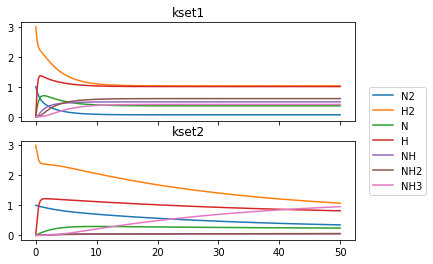

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt

fig1, ax = plt.subplots(2,1, sharex=True)

# Plotting the solutions to the system of ODEs for both sets of rate constants
for i in range(len(species)):
    ax[0].plot(solution1.t, solution1.y[i], label=species[i])
    ax[1].plot(solution2.t, solution2.y[i], label=species[i])
    
ax[0].set_title('kset1') 
ax[1].set_title('kset2') 
plt.legend(bbox_to_anchor=(1.04,1), loc="center left", borderaxespad=0)

Above we see that the equilibrium concentration of NH3 is greater using the second set of rate constants than with the first set of rate constants. The code below gives a quantitative difference, after a time of 1000 time units. Obviously we could have run this longer, but does it really matter?

In [36]:
# Arbitrary time range
time_range = (0, 1000.0)

# Solving the IVP for both sets of rate constants
solution1 = solve_ivp(lambda t,y: kinetic_model_Y(t, y, species, rxns1), time_range, ivs)
solution2 = solve_ivp(lambda t,y: kinetic_model_Y(t, y, species, rxns2), time_range, ivs)

print('"Equilibrium" concentration NH3 for kset1: {}'.format(solution1.y[-1][-1]))
print('"Equilibrium" concentration NH3 for kset2: {}'.format(solution2.y[-1][-1]))

"Equilibrium" concentration NH3 for kset1: 0.4110615538716267
"Equilibrium" concentration NH3 for kset2: 1.2120384647616957


Now we'll determine which set of rate constants affords a faster time to reach a concentration of 0.20 (problem units) of NH3

In [39]:
for ii,conc in enumerate(solution1.y[-1]):
    if conc >= 0.20:
        print('kset1: [NH3] = {0:0.4f} at t = {1:0.4f}'.format(conc, solution1.t[ii]))
        break
for ii,conc in enumerate(solution2.y[-1]):
    if conc >= 0.20:
        print('kset2: [NH3] = {0:0.4f} at t = {1:0.4f}'.format(conc, solution2.t[ii]))
        break

kset1: [NH3] = 0.2090 at t = 4.4584
kset2: [NH3] = 0.2177 at t = 10.2004


Clearly, we see that although the first set of rate constants affords a lower concentration of NH3 at equilibrium, it reaches a concentration of NH3 of 0.20 far faster.

Below is a snippet of code illustrating the times when the concentration of NH3 passes the 0.20 threshold. The concentration of NH3 is in blue and all other species' concentrations are in gray. The red line is the line $y=0.2$. THe results agree with our estimate above, to a degree. The difference in the time for `kset2` comes the fact that the `solve_ivp` function is not perfectly continuous. Instead, it is taking discrete steps at estimating the curve. This is why the time above does not perfectly match with the time that the concentration of NH3 reaches 0.2 on the curve below. For our purposes, however, it certainly accurate enough.

(0.0, 1.0)

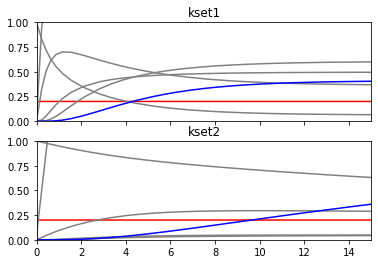

In [38]:
time_range = (0, 15.0)

solution1 = solve_ivp(lambda t,y: kinetic_model_Y(t, y, species, rxns1), time_range, ivs)
solution2 = solve_ivp(lambda t,y: kinetic_model_Y(t, y, species, rxns2), time_range, ivs)

fig2, ax = plt.subplots(2, 1, sharex=True, sharey=True)

ax[0].plot(np.linspace(-1,16, 10000), [0.2 for i in range(10000)], 'r')
ax[1].plot(np.linspace(-1,16, 10000), [0.2 for i in range(10000)], 'r')

# Plotting the solutions to the system of ODEs for both sets of rate constants
for i in range(len(species)):
    if species[i] == 'NH3':
         ax[0].plot(solution1.t, solution1.y[i], label=species[i], color='b')
         ax[1].plot(solution2.t, solution2.y[i], label=species[i], color='b')
    else:
        ax[0].plot(solution1.t, solution1.y[i], label=species[i], color='gray')
        ax[1].plot(solution2.t, solution2.y[i], label=species[i], color='gray')
    
ax[0].set_title('kset1') 
ax[1].set_title('kset2') 
ax[0].set_xlim([0,15])
ax[0].set_ylim([0,1]) 